### Installing Dependencies

In [66]:
!pip install spotipy

In [67]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import warnings

warnings.filterwarnings('ignore')

### Connecting to Spotify API

In [68]:
client_id = 'e147f5c0f9bb4479a3f04ed6d9bd90c0'
client_secret= 'dcd9d78261de46e08499ae7fb1ffdd2e'
scope = 'user-library-read'

In [69]:
token = util.prompt_for_user_token(scope, client_id= client_id, client_secret=client_secret, redirect_uri='http://localhost:8881/callback')

In [70]:
sp = spotipy.Spotify(auth=token)

### Retrieving user playlist info

In [71]:
playlist_dic = {}
playlist_cover_art = {}
for i in sp.current_user_playlists()['items']:

    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

In [72]:
playlist_dic

{'Mix': '21CCRUZ1X9etFMLCo2QJXN',
 'Chill': '37rxHwFCO9C0vHq209EhP2',
 'Hip hop': '3bYlAHuM95WmRPhB7vxpRK',
 'FR': '5USkQd9Temod7pyqUkGnzK',
 'Pop': '53a6KY4Vq4HEctO0D1rZUf'}

### Data Preparation

In [73]:
def generate_playlist_df(playlist_name, playlist_dic, spotify_data):
    
    playlist = pd.DataFrame()

    for i, j in enumerate(sp.playlist(playlist_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id']
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(spotify_data['track_id'].values)].sort_values('date_added',ascending = False)

    return playlist

In [74]:
import pandas as pd
spotify_data = pd.read_csv('SpotifyFeatures.csv')

In [75]:
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [76]:
playlist_df = generate_playlist_df('Pop', playlist_dic, spotify_data)

In [77]:
playlist_df.head()

,artist,track_name,track_id,url,date_added
93,Carly Rae Jepsen,Run Away With Me,5e0vgBWfwToyphURwynSXa,https://i.scdn.co/image/ab67616d00001e029aaa99...,2023-03-23 16:56:35+00:00
88,Lana Del Rey,Born To Die,487OPlneJNni3NWC8SYqhW,https://i.scdn.co/image/ab67616d00001e02cb7660...,2023-02-19 18:37:14+00:00
83,Lorde,Royals,2dLLR6qlu5UJ5gk0dKz0h3,https://i.scdn.co/image/ab67616d00001e02187331...,2023-02-05 07:15:02+00:00
77,Taylor Swift,End Game,2x0WlnmfG39ZuDmstl9xfX,https://i.scdn.co/image/ab67616d00001e02da5d5a...,2023-02-03 21:02:46+00:00
72,Billie Eilish,idontwannabeyouanymore,41zXlQxzTi6cGAjpOXyLYH,https://i.scdn.co/image/ab67616d00001e02a9f6c0...,2023-01-30 10:10:27+00:00


In [78]:
from skimage import io
import matplotlib.pyplot as plt

def visualize_cover_art(playlist_df):
    temp = playlist_df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))) , facecolor='#8cfc03')
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(len(temp) / columns + 1, columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        s='' 
        plt.xlabel(s.join(playlist_df['track_name'].values[i].split(' ')[:4]), fontsize = 10, fontweight='bold')
        plt.tight_layout(h_pad=0.8, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()

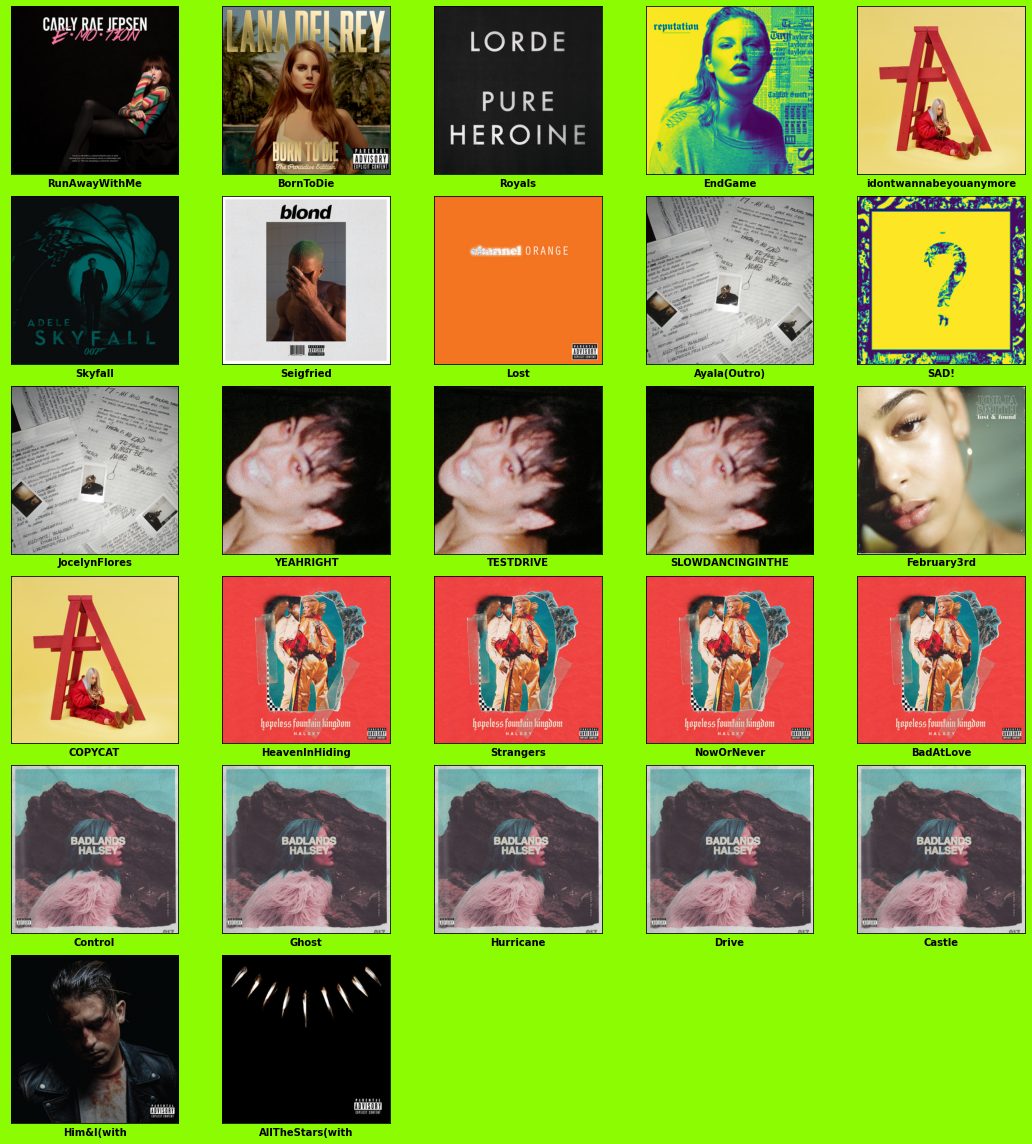

In [79]:
visualize_cover_art(playlist_df)

In [80]:
playlist_df.to_csv('playlist.csv')

In [81]:
spotify_features_df = spotify_data

### Feature Engineering

In [82]:
genre_OHE = pd.get_dummies(spotify_features_df.genre)
genre_OHE.head()

,A Capella,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,...,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
key_OHE = pd.get_dummies(spotify_features_df.key)
key_OHE.head()

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaled_features = MinMaxScaler().fit_transform([spotify_features_df['acousticness'].values,
                                                spotify_features_df['danceability'].values,
                                                spotify_features_df['duration_ms'].values,
                                                spotify_features_df['energy'].values,
                                                spotify_features_df['instrumentalness'].values,
                                                spotify_features_df['liveness'].values,
                                                spotify_features_df['loudness'].values,
                                                spotify_features_df['speechiness'].values,
                                                spotify_features_df['tempo'].values,
                                                spotify_features_df['valence'].values])

In [86]:
spotify_features_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness',
                     'speechiness','tempo','valence']] = scaled_features.T

In [87]:
spotify_features_df = spotify_features_df.drop('genre',axis = 1)
spotify_features_df = spotify_features_df.drop('artist_name', axis = 1)
spotify_features_df = spotify_features_df.drop('track_name', axis = 1)
spotify_features_df = spotify_features_df.drop('popularity',axis = 1)
spotify_features_df = spotify_features_df.drop('key', axis = 1)
spotify_features_df = spotify_features_df.drop('mode', axis = 1)
spotify_features_df = spotify_features_df.drop('time_signature', axis = 1)

In [88]:
spotify_features_df = spotify_features_df.join(genre_OHE)
spotify_features_df = spotify_features_df.join(key_OHE)

In [89]:
spotify_features_df.head()

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0BRjO6ga9RKCKjfDqeFgWV,0.000025,0.000022,1.0,0.000028,0.000018,0.000022,0.0,0.000019,0.001699,...,0,0,1,0,0,0,0,0,0,0
1,0BjC1NfoEOOusryehmNudP,0.000042,0.000045,1.0,0.000046,0.000040,0.000042,0.0,0.000041,0.001307,...,0,0,0,0,0,0,0,1,0,0
2,0CoSDzoNIKCRs124s9uTVy,0.000087,0.000085,1.0,0.000082,0.000082,0.000082,0.0,0.000082,0.000666,...,0,1,0,0,0,0,0,0,0,0
3,0Gc6TVm52BwZD07Ki6tIvf,0.000084,0.000081,1.0,0.000082,0.000080,0.000081,0.0,0.000080,0.001207,...,0,0,1,0,0,0,0,0,0,0
4,0IuslXpMROHdEPvSl1fTQK,0.000267,0.000260,1.0,0.000259,0.000257,0.000258,0.0,0.000256,0.001957,...,0,0,0,0,0,0,1,0,0,0


In [90]:
from datetime import datetime

### Defining playlist vector

In [91]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id',
                                                                how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime()
                                                               - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3]
                                         .mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [92]:
playlist_vector, nonplaylist_df = generate_playlist_vector(spotify_features_df, playlist_df, 1.2)

### Generating recommendations using cosine similarity

In [93]:
from sklearn.metrics.pairwise import cosine_similarity

In [94]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):

    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist['sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15

In [95]:
top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)  

In [96]:
top15

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sim,url
95590,Indie,khai dreams,Come True,7hqL3TkHYyamoTR8mTHbKc,56,0.000030,0.000032,1.0,0.000031,0.000027,C#,0.000028,0.0,Minor,0.000028,0.000642,4/4,0.000031,0.881917,https://i.scdn.co/image/ab67616d00001e02996878...
19054,Dance,3LAU,Game Time (feat. Ninja),229MM2St7SnW43nT8ADlG8,58,0.000026,0.000029,1.0,0.000032,0.000031,C#,0.000027,0.0,Major,0.000026,0.000632,4/4,0.000029,0.881917,https://i.scdn.co/image/ab67616d00001e02a18932...
14380,Dance,TLC,Waterfalls,6qspW4YKycviDFjHBOaqUY,72,0.000027,0.000029,1.0,0.000028,0.000026,C#,0.000027,0.0,Major,0.000027,0.000641,4/4,0.000029,0.881917,https://i.scdn.co/image/ab67616d00001e02a6125b...
109365,Pop,TLC,Waterfalls,6qspW4YKycviDFjHBOaqUY,73,0.000027,0.000029,1.0,0.000028,0.000026,C#,0.000027,0.0,Major,0.000027,0.000641,4/4,0.000029,0.881917,https://i.scdn.co/image/ab67616d00001e02a6125b...
152170,Pop,K CAMP,Money Baby,3pT00QwvR8AzFtL3hedljs,56,0.000026,0.000030,1.0,0.000029,0.000026,C#,0.000027,0.0,Major,0.000026,0.000642,4/4,0.000028,0.881917,https://i.scdn.co/image/ab67616d00001e02b11df6...
95647,Indie,Xuitcasecity,Bout You,0dk1SSOkUEnU2HF1LnYZDI,53,0.000030,0.000034,1.0,0.000034,0.000030,C#,0.000032,0.0,Major,0.000030,0.000638,4/4,0.000034,0.881917,https://i.scdn.co/image/ab67616d00001e0250322b...
141552,Indie,Kim Petras,Hills,3qU4w55KUa3jKFxT3xXqLu,54,0.000025,0.000029,1.0,0.000028,0.000025,C#,0.000026,0.0,Major,0.000026,0.000634,4/4,0.000028,0.881917,https://i.scdn.co/image/ab67616d00001e027f9217...
18231,Dance,Kim Petras,Hills,3qU4w55KUa3jKFxT3xXqLu,54,0.000025,0.000029,1.0,0.000028,0.000025,C#,0.000026,0.0,Major,0.000026,0.000634,4/4,0.000028,0.881917,https://i.scdn.co/image/ab67616d00001e027f9217...
111719,Pop,SZA,Prom,5yvhdo8FXbBsIllxv2Rr94,64,0.000025,0.000029,1.0,0.000028,0.000025,C#,0.000025,0.0,Major,0.000025,0.000637,4/4,0.000026,0.881917,https://i.scdn.co/image/ab67616d00001e024c79d5...
151432,Pop,Logic,Killing Spree,6OQea06z3cbOqYgG2O6eOZ,61,0.000028,0.000032,1.0,0.000032,0.000028,C#,0.000028,0.0,Minor,0.000029,0.000628,4/4,0.000029,0.881917,https://i.scdn.co/image/ab67616d00001e02cfdf40...


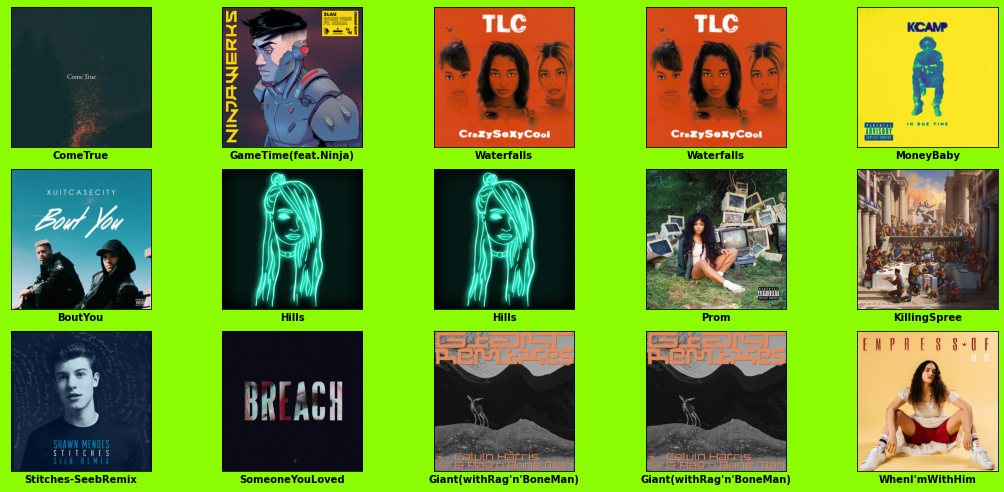

In [97]:
visualize_cover_art(top15)